# Instance based learning

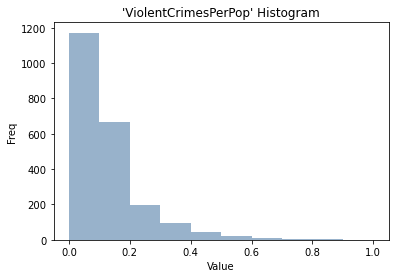

(1549, 100)
(665, 100)


In [1]:
%run Preprocessing.ipynb

In [20]:
# import packages
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import statistics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# import time
# from sklearn.model_selection import GridSearchCV

In [6]:
# set train and test sets
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

# Function for plotting confusion matrix
def plot_confusion_matrix(train_p, train, dom):
    cf = confusion_matrix(train_p,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    # plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()

## Support Vector Machines

**SVC with Hyper-parameter Tuning**
- NOTE: Commenting grid search out to improve computational efficiency

In [11]:
# # defining parameter range
# param_grid_SVC = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear','poly','sigmoid']}

# grid_SVC = GridSearchCV(SVC(random_state=0), param_grid_SVC, refit = True, verbose = 3)

# # fitting the model for grid search
# grid_SVC.fit(x_train, y_train)

# # print best parameter after tuning
# print(grid_SVC.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grid_SVC.best_estimator_)

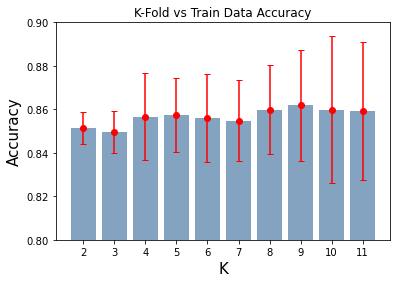

In [40]:
SVM_clf = SVC(C=1, gamma=0.1)
SVM_clf.fit(x_train, y_train)  
  

# Perform k-fold validation on training data
x = []
y = []
error = []

for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(SVM_clf, x_train, y_train, cv= kf, scoring="accuracy")
    x.append(i)
    y.append(score.mean())
    error.append(statistics.stdev(score))



plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.errorbar(x, y, yerr = error, barsabove = False, fmt ='o', capsize = 3, color = 'red')

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(x)
plt.ylim(0.8, 0.9)
plt.show()

In [41]:
# Check k-fold split
kf =KFold(n_splits=9, shuffle=True, random_state=42)
score = cross_val_score(SVM_clf, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score(in %): {"{:.2f}".format(score.mean()*100)}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.86705202 0.80813953 0.88372093 0.89534884 0.87209302 0.8372093
 0.86046512 0.86627907 0.86627907]
Average score(in %): 86.18
Standard Deviation in score: 0.02


In [16]:
# Compare train & test data
y_train_pred = SVM_clf.predict(x_train)
y_test_pred = SVM_clf.predict(x_test)

print(f'Support Vector Machine Train Model Accuracy(in %): {accuracy_score(y_train, y_train_pred)*100}')
print(f'Support Vector Machine Test Model Accuracy(in %): {accuracy_score(y_test, y_test_pred)*100}')

Support Vector Machine Train Model Accuracy(in %): 87.60490639122014
Support Vector Machine Test Model Accuracy(in %): 87.36842105263159


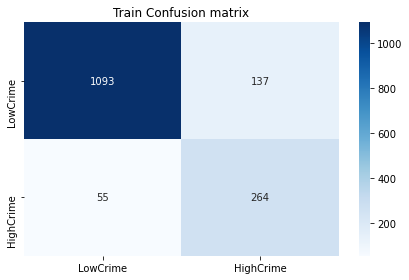

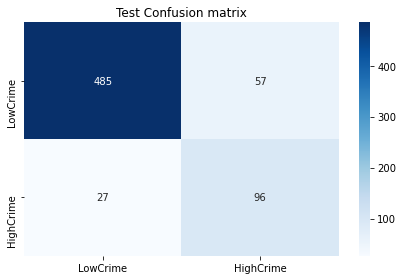

In [18]:
# Plot confusion matrix
plot_confusion_matrix(y_train_pred,y_train,dom='Train')
plot_confusion_matrix(y_test_pred,y_test,dom='Test')

In [19]:
# Get classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       512
         1.0       0.78      0.63      0.70       153

    accuracy                           0.87       665
   macro avg       0.84      0.79      0.81       665
weighted avg       0.87      0.87      0.87       665



## K Nearest Neighbour

**KNearest with Hyper-parameter Tuning**
- NOTE: Commenting out to focus on SVM

In [70]:
# # defining parameter range
# parameters_grid_KNN = {'n_neighbors': list(range(5,10)),
#                        'leaf_size': [20,30,40],
#                        'p': [1,2],
#                        'weights': ['uniform', 'distance'],
#                        'algorithm':['auto','ball_tree','kd_tree','brute'],
#                        'metric':['euclidean','manhattan','cosine','minkowski','chebyshev']}
#
# grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters_grid_KNN, refit = True, verbose = 3)
#
# # fitting the model for grid search
# grid_KNN.fit(x_train, y_train)
#
# # print best parameter after tuning
# print(grid_KNN.best_params_)
#
# # print how our model looks after hyper-parameter tuning
# print(grid_KNN.best_estimator_)

In [71]:
# grid_KNN_predictions = grid_KNN.predict(x_test)
#
# # print classification report
# print(classification_report(y_test, grid_KNN_predictions))
# print('Accuracy score for the KNN model after hyper-parameter tuning:',accuracy_score(y_test, grid_KNN_predictions))

In [72]:
# mat = confusion_matrix(y_test, grid_KNN_predictions)
#
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
# plt.title('K Nearest Neighbour model with Hyper-parameter Tuning')
# plt.xlabel('true label')
# plt.ylabel('predicted label')

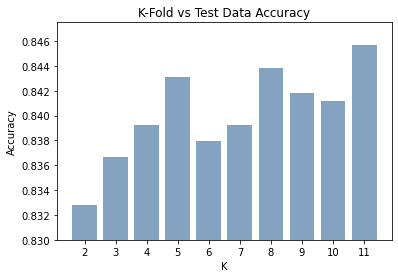

In [73]:
# KNN = KNeighborsClassifier(leaf_size=20, metric='cosine', n_neighbors=9, p=1)
# KNN.fit(x_train, y_train)

# kfold_scores = {}
# for i in range(2,12):
#     kf =KFold(n_splits=i, shuffle=True, random_state=42)
#     score = cross_val_score(KNN, x_train, y_train, cv= kf, scoring="accuracy")
#     res = {str(i): score.mean()}
#     kfold_scores.update(res)

# for key in kfold_scores:
#     plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

# plt.title('K-Fold vs Test Data Accuracy')
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# plt.ylim(0.83, 0.8475)
# plt.show()

In [74]:
# kf =KFold(n_splits=2, shuffle=True, random_state=42)
# score = cross_val_score(KNN, x_train, y_train, cv= kf, scoring="accuracy")
# print(f'Scores for each fold are: {score}')
# print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83354839 0.83204134]
Average score: 0.83


In [75]:
# print prediction results
# KNN_predictions = KNN.predict(x_test)
# print(classification_report(y_test, KNN_predictions))
# print('Accuracy score for the default KNN model:',accuracy_score(y_test, KNN_predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       512
         1.0       0.75      0.64      0.69       153

    accuracy                           0.87       665
   macro avg       0.82      0.79      0.80       665
weighted avg       0.86      0.87      0.86       665

Accuracy score for the default KNN model: 0.8676691729323308


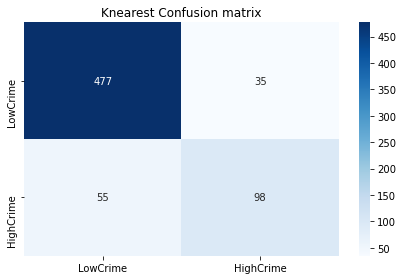

In [76]:
# plot confusion matrix
# plot_confusion_matrix(y_test,default_KNN_predictions,dom='Knearest')

## Collaborative Filtering

**Pre-processing for collaborative filtering algorithm**
- NOTE: Commenting out to focus on SVM

In [77]:
# import pandas as pd
# import numpy as np
# from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
# from surprise.model_selection import cross_validate
# from surprise import Reader, Dataset
#
# # Read data and assign NA to missing values
# data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
#                    sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])
#
#
# data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
#            'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
#            'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
#            'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
#            'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
#            'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
#            'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
#            'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
#            'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
#            'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
#            'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
#            'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
#            'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
#            'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
#            'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
#            'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
#            'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
#            'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
#            'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
#            'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
#            'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
#            'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
#            'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']
#
# # Select the relevant columns to use in the model
# cols_final = data[[
#  'population',
#  'racepctblack',
#  'agePct12t29',
#  'numbUrban',
#  'medIncome',
#  'pctWWage',
#  'pctWInvInc',
#  'medFamInc',
#  'perCapInc',
#  'whitePerCap',
#  'PctEmploy',
#  'MalePctDivorce',
#  'MalePctNevMarr',
#  'TotalPctDiv',
#  'PctKids2Par',
#  'PctWorkMom',
#  'NumImmig',
#  'PctRecImmig8',
#  'PctRecImmig10',
#  'PctLargHouseOccup',
#  'PersPerOccupHous',
#  'PersPerRentOccHous',
#  'PctPersOwnOccup',
#  'PctPersDenseHous',
#  'HousVacant',
#  'PctHousOwnOcc',
#  'OwnOccLowQuart',
#  'OwnOccMedVal',
#  'RentLowQ',
#  'RentMedian',
#  'MedRent',
#  'MedOwnCostPctIncNoMtg',
#  'NumStreet',
#  'ViolentCrimesPerPop']]
#
# # Remove missing values
# # First establish how much data is missing
# cols_final.isnull().sum().sort_values(ascending=False).head()
#
#
# # Impute the missing values using SimpleImputer in sklearn.impute
# from sklearn.impute import SimpleImputer
#
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(cols_final)
# cols_final = pd.DataFrame(data=imp.transform(cols_final), columns=cols_final.columns)
#
# # Add community name as a user
# communityname = data[['communityname','population']]
# cols_final = communityname.merge(cols_final)
#
# # Check if there is still missing data
# cols_final.isnull().sum().sort_values(ascending=False)
#
# #Transfer features value into 1-5 according to quantiles
# cols_final['population'] = pd.qcut(cols_final['population'].values, 5, duplicates = 'drop').codes + 1
# cols_final['racepctblack'] = pd.qcut(cols_final['racepctblack'].values, 5, duplicates = 'drop').codes + 1
# cols_final['agePct12t29'] = pd.qcut(cols_final['agePct12t29'].values, 5, duplicates = 'drop').codes + 1
# cols_final['numbUrban'] = pd.qcut(cols_final['numbUrban'].values, 5, duplicates = 'drop').codes + 1
# cols_final['medIncome'] = pd.qcut(cols_final['medIncome'].values, 5, duplicates = 'drop').codes + 1
# cols_final['pctWWage'] = pd.qcut(cols_final['pctWWage'].values, 5, duplicates = 'drop').codes + 1
# cols_final['pctWInvInc'] = pd.qcut(cols_final['pctWInvInc'].values, 5, duplicates = 'drop').codes + 1
# cols_final['medFamInc'] = pd.qcut(cols_final['medFamInc'].values, 5, duplicates = 'drop').codes + 1
# cols_final['perCapInc'] = pd.qcut(cols_final['perCapInc'].values, 5, duplicates = 'drop').codes + 1
# cols_final['whitePerCap'] = pd.qcut(cols_final['whitePerCap'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctEmploy'] = pd.qcut(cols_final['PctEmploy'].values, 5, duplicates = 'drop').codes + 1
# cols_final['MalePctDivorce'] = pd.qcut(cols_final['MalePctDivorce'].values, 5, duplicates = 'drop').codes + 1
# cols_final['MalePctNevMarr'] = pd.qcut(cols_final['MalePctNevMarr'].values, 5, duplicates = 'drop').codes + 1
# cols_final['TotalPctDiv'] = pd.qcut(cols_final['TotalPctDiv'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctKids2Par'] = pd.qcut(cols_final['PctKids2Par'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctWorkMom'] = pd.qcut(cols_final['PctWorkMom'].values, 5, duplicates = 'drop').codes + 1
# cols_final['NumImmig'] = pd.qcut(cols_final['NumImmig'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctRecImmig8'] = pd.qcut(cols_final['PctRecImmig8'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctRecImmig10'] = pd.qcut(cols_final['PctRecImmig10'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctLargHouseOccup'] = pd.qcut(cols_final['PctLargHouseOccup'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PersPerOccupHous'] = pd.qcut(cols_final['PersPerOccupHous'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctPersOwnOccup'] = pd.qcut(cols_final['PctPersOwnOccup'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctPersDenseHous'] = pd.qcut(cols_final['PctPersDenseHous'].values, 5, duplicates = 'drop').codes + 1
# cols_final['HousVacant'] = pd.qcut(cols_final['HousVacant'].values, 5, duplicates = 'drop').codes + 1
# cols_final['PctHousOwnOcc'] = pd.qcut(cols_final['PctHousOwnOcc'].values, 5, duplicates = 'drop').codes + 1
# cols_final['OwnOccLowQuart'] = pd.qcut(cols_final['OwnOccLowQuart'].values, 5, duplicates = 'drop').codes + 1
# cols_final['OwnOccMedVal'] = pd.qcut(cols_final['OwnOccMedVal'].values, 5, duplicates = 'drop').codes + 1
# cols_final['RentLowQ'] = pd.qcut(cols_final['RentLowQ'].values, 5, duplicates = 'drop').codes + 1
# cols_final['RentMedian'] = pd.qcut(cols_final['RentMedian'].values, 5, duplicates = 'drop').codes + 1
# cols_final['MedRent'] = pd.qcut(cols_final['MedRent'].values, 5, duplicates = 'drop').codes + 1
# cols_final['MedOwnCostPctIncNoMtg'] = pd.qcut(cols_final['MedOwnCostPctIncNoMtg'].values, 5, duplicates = 'drop').codes + 1
# cols_final['NumStreet'] = pd.qcut(cols_final['NumStreet'].values, 5, duplicates = 'drop').codes + 1
# cols_final['ViolentCrimesPerPop'] = pd.qcut(cols_final['ViolentCrimesPerPop'].values, 5, duplicates = 'drop').codes + 1
#
# # change to unpivoted table
# data = cols_final.melt(id_vars=['communityname'], var_name='features', value_name='values')

In [78]:
# #Choose the best algorithm for recommender system
#
# # A reader is still needed but only the rating_scale param is requiered.
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(data, reader)
#
# cv = []
# # Iterate over all recommender system algorithms
# for recsys in [NMF(), SVD(), SVDpp(), KNNWithZScore(), CoClustering()]:
#     # Perform cross validation
#     tmp = cross_validate(recsys, data, measures=['RMSE'], cv=3, verbose=False)
#     cv.append((str(recsys).split(' ')[0].split('.')[-1], tmp['test_rmse'].mean()))
# pd.DataFrame(cv, columns=['RecSys', 'RMSE'])

In [79]:
# # change to unpivoted table
# data = cols_final.melt(id_vars=['communityname'], var_name='features', value_name='values')
#
# #Split train and test data
# split_value = int(len(cols_final) * 0.80)
# data = data[:-468]
#
# from surprise import SVD
# from surprise import Reader, Dataset
#
# # A reader is still needed but only the rating_scale param is requiered.
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(data, reader)
#
# algo = SVD()
# algo.fit(data.build_full_trainset())
# crime_prediction = []
# for communityname in cols_final['communityname'][split_value:]:
#     crime_prediction.append((communityname, algo.predict(communityname,'ViolentCrimesPerPop').est))
#
# pd.DataFrame(crime_prediction, columns=['communityname', 'predictions']).sort_values('predictions', ascending=False).head(10)